In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("data_for_aviation_model.csv")
df.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,...,Weather.Condition,Broad.phase.of.flight,Report.Status,States,Year,Month.Abbr,Day.Name.Abbr,Weekend,Model.Capacity,Capacity
0,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,cessna,140,No,1.0,...,VMC,Takeoff,Probable Cause,WA,1982,Jan,Fri,False,cessna_small,small
1,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,cessna,401b,No,2.0,...,IMC,Landing,Probable Cause,NJ,1982,Jan,Fri,False,cessna_medium,medium
2,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,Airplane,north american,navion l17b,No,1.0,...,IMC,Cruise,Probable Cause,FL,1982,Jan,Fri,False,namerican_medium,medium
3,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,Airplane,piper,pa28161,No,1.0,...,VMC,Approach,Probable Cause,NM,1982,Jan,Fri,False,piper_medium,medium
4,1982-01-01,"TUSKEGEE, AL",United States,Non-Fatal,Substantial,Airplane,beech,v35b,No,1.0,...,VMC,Landing,Probable Cause,AL,1982,Jan,Fri,False,beech_medium,medium


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62114 entries, 0 to 62113
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              62114 non-null  object 
 1   Location                62105 non-null  object 
 2   Country                 62114 non-null  object 
 3   Injury.Severity         62039 non-null  object 
 4   Aircraft.damage         60855 non-null  object 
 5   Aircraft.Category       62114 non-null  object 
 6   Make                    62107 non-null  object 
 7   Model                   62093 non-null  object 
 8   Amateur.Built           62100 non-null  object 
 9   Number.of.Engines       61417 non-null  float64
 10  Engine.Type             60726 non-null  object 
 11  Purpose.of.flight       60295 non-null  object 
 12  Total.Fatal.Injuries    62114 non-null  float64
 13  Total.Serious.Injuries  62114 non-null  float64
 14  Total.Minor.Injuries    62114 non-null

In [30]:
df.isnull().sum()

Event.Date                    0
Location                      9
Country                       0
Injury.Severity              75
Aircraft.damage            1259
Aircraft.Category             0
Make                          7
Model                        21
Amateur.Built                14
Number.of.Engines           697
Engine.Type                1388
Purpose.of.flight          1819
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition           397
Broad.phase.of.flight     11696
Report.Status              1507
States                       46
Year                          0
Month.Abbr                    0
Day.Name.Abbr                 0
Weekend                       0
Model.Capacity               18
Capacity                   7501
dtype: int64

In [10]:
df['Model.Capacity'].unique().size

6622

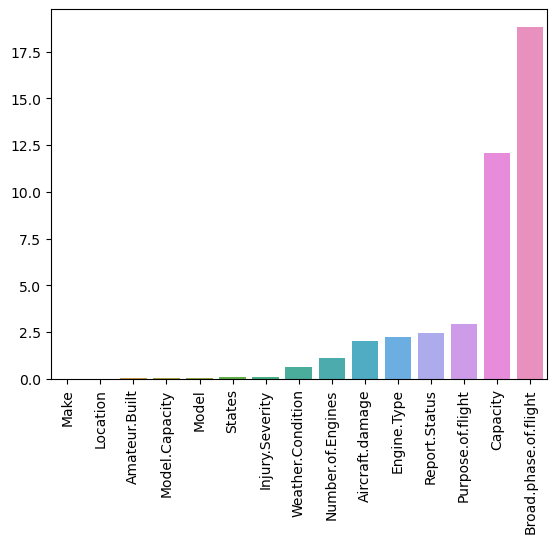

In [31]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [32]:
# data frame with those groups and percentage of missing rows in those groups
missing_values_count = df[df['Capacity'].isna()].groupby('Make').size().sort_values(ascending=False)

print(missing_values_count)

Make
vans                 108
airbus                99
bombardier            96
dehavilland           92
embraer               85
                    ... 
haeussler ray          1
hager clinton ray      1
hahn                   1
haines                 1
zwicker murray r       1
Length: 3525, dtype: int64


In [26]:
sikorsky_df = df[df['Make'] == 'sikorsky']

# Use the value_counts() function to get the count of each unique model
model_counts = sikorsky_df['Model'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'sikorsky' brand:")
print(top_20_models)

Top 20 models from the 'sikorsky' brand:
s76a      24
s55b      11
s76        8
s58et      6
s58j       5
s61a       5
s58        5
s76b       5
ch54a      4
uh19d      4
s58t       4
s61n       4
s76c       4
s55        3
s58b       3
s64e       3
uh60a      3
s76a++     3
s58jt      3
269c       2
s58bt      2
s70a       2
s55c       2
sk76a      2
ch19e      2
s58f       2
s58d       2
s58e       2
s55t       1
s 58jt     1
uh19       1
hh60l      1
s76a+      1
s97a       1
s55qt      1
s 61a      1
ch54b      1
s61        1
s76c++     1
s92a       1
92         1
uh34d      1
s 76b      1
s58ht      1
sk58       1
hh3f       1
s64f       1
h19a       1
h19        1
h19d       1
Name: Model, dtype: int64


In [15]:
cirrus_df = df[df['Make'] == 'cirrus']

# Use the value_counts() function to get the count of each unique model
model_counts = cirrus_df['Model'].value_counts()

top_20_models = model_counts.head(50)

print("Top 20 models from the 'cirrus' brand:")
print(top_20_models)

Top 20 models from the 'cirrus' brand:
sr22               265
sr20                90
sr22t               18
sf50                 4
sr22  no series      2
standard cirrus      1
standard             1
cirrus vf30          1
vk30                 1
sr 20                1
sr22 g2              1
sr22gts              1
sr                   1
Name: Model, dtype: int64


In [13]:
make_counts = df['Model.Capacity'].value_counts().iloc[50:101]
print(make_counts)

sa226tc               64
rv8                   64
a1b                   61
sa227ac               59
cl6002b19             57
kitfox                54
2t1a2                 51
upf7                  50
m18a                  50
aa1                   50
searey                49
skybolt               49
s2b                   48
8                     48
35a                   48
thorp t18             45
firefly 7             45
aa1a                  44
b8m                   44
navion                43
sonex                 43
mustang ii            43
glastar               43
dw1                   43
q2                    42
h295                  41
kitfox iv             41
aeronca_medium        41
ctsw                  39
pitts s2b             39
la4                   39
ii                    38
longez                38
de havilland_large    38
b2b                   38
8f                    38
aa5b                  38
long ez               38
dragonfly             38
christen eagle ii     35
